In [35]:
# Data Prep
import pandas as pd
import numpy as np

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
font = {"fontsize": 12, 
        "family": "serif"}

In [36]:
user = "/Users/Colette/anaconda_important_code/acapstone"
factory_names = pd.read_csv(user + "/data/data_exploration/factory_names/sustainable_factory_names.csv")

In [37]:
factory_data = {}
for factory in factory_names["name"]:
    factory_data[factory] = pd.read_csv(user + "/data/data_exploration/data_" + factory + ".csv")
    factory_data[factory]["day"] = 1
    factory_data[factory]["date"] = pd.to_datetime(
        factory_data[factory][['year', 'month', 'day']])

# Summary Statistics

In [38]:
fuel_descriptive_stats = {}
production_descriptive_stats = {}
for factory in factory_data:
    factory_data[factory][factory + "_fuel"] = factory_data[factory]["fuel"]
    fuel_descriptive_stats[factory] = factory_data[factory][factory + "_fuel"].describe(include=[np.number])
    factory_data[factory][factory + "_production"] = factory_data[factory]["production"]
    production_descriptive_stats[factory] = factory_data[factory][factory + "_production"].describe(include=[np.number])
fuel_stats = pd.concat([fuel_descriptive_stats[x] for x in fuel_descriptive_stats], axis=1)
production_stats = pd.concat([production_descriptive_stats[x] for x in production_descriptive_stats], axis=1)


In [39]:
fuel_stats.loc["max"]

MAK_Knit_fuel      22960.72000
TintColor_fuel    146760.00000
MAK_Cut_fuel         315.35000
MCS_fuel            6159.49396
Name: max, dtype: float64

In [40]:
x = ["MAK Knit", "TintColor", "MAK Cut", "MCS"]
y_fuel = fuel_stats.loc["mean"]
y_production = production_stats.loc["mean"]

min_fuel = fuel_stats.loc["min"]
min_production = production_stats.loc["min"]

max_fuel = fuel_stats.loc["max"] - y_fuel
max_production = production_stats.loc["max"] - y_production

In [41]:
fuel_stats = fuel_stats.drop(["std", "25%", "50%", "75%"])
production_stats = production_stats.drop(["std", "25%", "50%", "75%"])

In [42]:
production_stats.loc["range"] = production_stats.loc["max"] - production_stats.loc["min"]
production_stats

,MAK_Knit_production,TintColor_production,MAK_Cut_production,MCS_production
count,12.000000,12.000000,12.000000,12.000000
mean,172097.179167,191178.416667,164956.641667,234680.666667
min,94745.300000,110253.000000,57849.000000,132747.000000
max,208273.290000,260535.000000,214940.800000,328602.000000
range,113527.990000,150282.000000,157091.800000,195855.000000


In [43]:
factory_data["MAK_Knit"]["fuel"]

0      3603.55
1     16010.19
2     17297.24
3     16213.32
4     22960.72
5     19459.31
6     12506.62
7     13358.30
8     11454.44
9     17449.59
10    12786.99
11    12949.92
Name: fuel, dtype: float64

In [44]:
fuel_stats.loc["range"] = fuel_stats.loc["max"] - fuel_stats.loc["min"]
fuel_stats

,MAK_Knit_fuel,TintColor_fuel,MAK_Cut_fuel,MCS_fuel
count,12.000000,12.00,12.000000,12.000000
mean,14670.849167,95676.25,210.096667,4178.291861
min,3603.550000,54853.00,51.490000,2147.450000
max,22960.720000,146760.00,315.350000,6159.493960
range,19357.170000,91907.00,263.860000,4012.043960


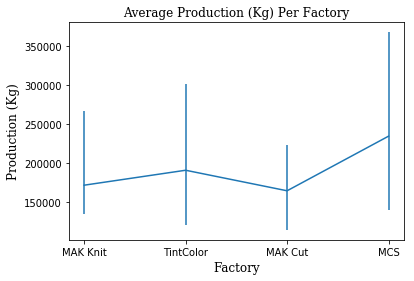

In [45]:
# plt.scatter(x, y)
yerr = np.array([(max_production[0], max_production[1], max_production[2], max_production[3]), 
                 (min_production[0], min_production[1], min_production[2], min_production[3])])

plt.errorbar(x, y_production, yerr)
plt.title("Average Production (Kg) Per Factory", **font)
plt.xlabel("Factory", **font)
plt.ylabel("Production (Kg)", **font)
plt.show()

In [46]:
min_fuel

MAK_Knit_fuel      3603.55
TintColor_fuel    54853.00
MAK_Cut_fuel         51.49
MCS_fuel           2147.45
Name: min, dtype: float64

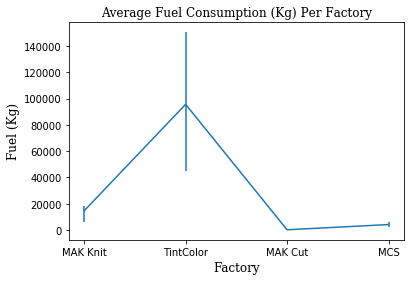

In [47]:
# plt.scatter(x, y)
fuel_yerr = np.array([(max_fuel[0], max_fuel[1], max_fuel[2], max_fuel[3]), 
                 (min_fuel[0], min_fuel[1], min_fuel[2], min_fuel[3])])
plt.errorbar(x, y_fuel, fuel_yerr)
plt.title("Average Fuel Consumption (Kg) Per Factory", **font)
plt.xlabel("Factory", **font)
plt.ylabel("Fuel (Kg)", **font)
plt.show()

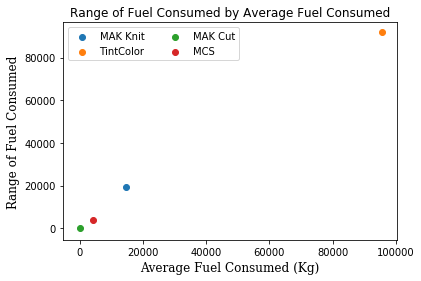

In [48]:
x = y_fuel
y = fuel_stats.loc["range"]
for factory in range(len(x)):
    plt.scatter(x[factory], y[factory])
    plt.legend(("MAK Knit", "TintColor", "MAK Cut", "MCS"),
              scatterpoints=1,
              loc="upper left",
              ncol=2)
    plt.xlabel("Average Fuel Consumed (Kg)", **font)
    plt.ylabel("Range of Fuel Consumed", **font)
    plt.title("Range of Fuel Consumed by Average Fuel Consumed")
plt.show()

In [49]:
x = ["MAK Knit", "MAK Cut", "MCS"]
y = []
mini = []
maxi = []
for factory in factory_data:
    mean = np.mean(factory_data[factory]["fuel"])
    y.append(mean)
    mini.append(min(factory_data[factory]["fuel"]))
    maxi.append(max(factory_data[factory]["fuel"]) - mean)
    

In [50]:
del y[1]

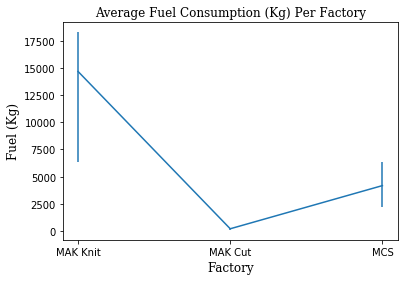

In [51]:
# plt.scatter(x, y)
yerr = np.array([(maxi[0], maxi[2], maxi[3]), 
                 (mini[0], mini[2], mini[3])])
plt.errorbar(x, y, yerr)
plt.title("Average Fuel Consumption (Kg) Per Factory", **font)
plt.xlabel("Factory", **font)
plt.ylabel("Fuel (Kg)", **font)
plt.show()

# Fuel Consumption Over Time

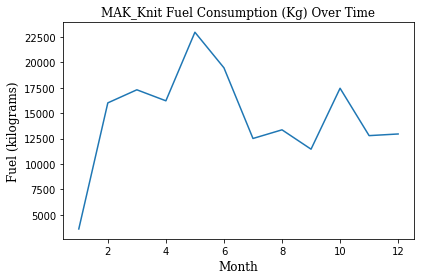

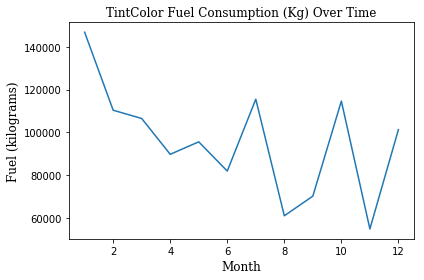

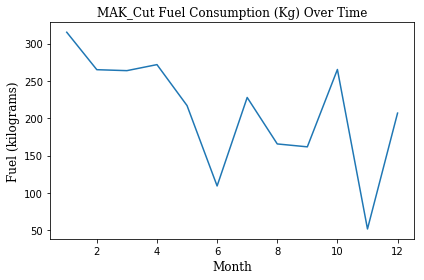

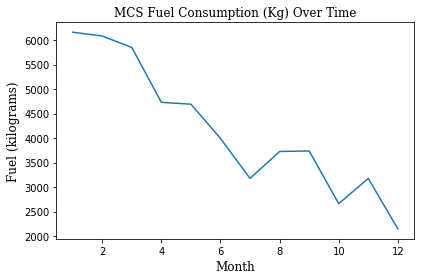

In [52]:
for factory in factory_data:
    x_month = factory_data[factory]["month"]
    y_fuel = factory_data[factory]["fuel"]
    plt.plot(x_month, y_fuel)
    plt.xlabel("Month", **font)
    plt.ylabel("Fuel (" + factory_data[factory]["unit_fuel"][0] + ")", **font)
    plt.title(factory + " Fuel Consumption (Kg) Over Time", **font)
    plt.tight_layout()
    plt.savefig("images/fuel_" + factory + ".png")
    plt.show()

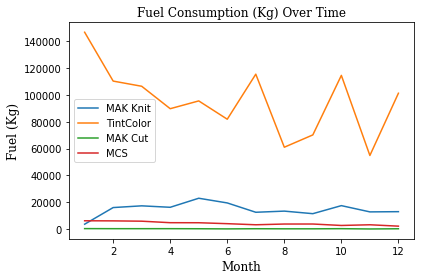

In [53]:
for factory in factory_data:
    x_month = factory_data[factory]["month"]
    y_fuel = factory_data[factory]["fuel"]
    plt.plot(x_month, y_fuel)
    plt.legend(("MAK Knit", "TintColor", "MAK Cut", "MCS"))
    plt.xlabel("Month", **font)
    plt.ylabel("Fuel (Kg)", **font)
    plt.title("Fuel Consumption (Kg) Over Time", **font)
    plt.tight_layout()
    plt.savefig("images/fuel_total.png")
plt.show()

# Production Over Time

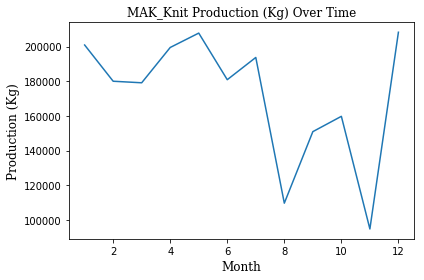

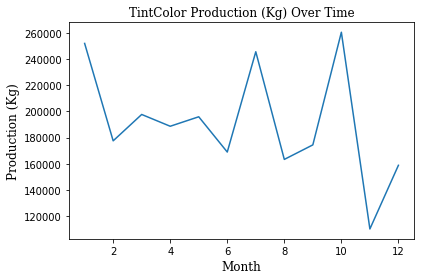

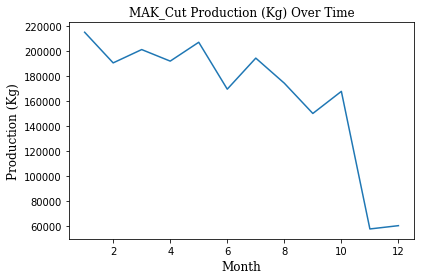

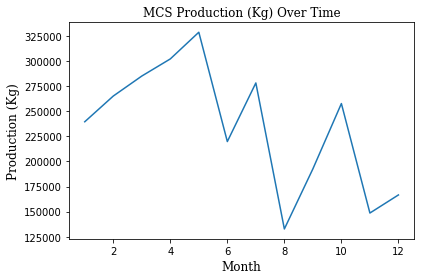

In [54]:
for factory in factory_data:
    x = factory_data[factory]["month"]
    y = factory_data[factory]["production"]
    plt.plot(x, y)
    plt.xlabel("Month", **font)
    plt.ylabel("Production (Kg)", **font)
    plt.title(factory + " Production (Kg) Over Time", **font)
    plt.tight_layout()
    plt.savefig("images/production_" + factory + ".png")
    plt.show()

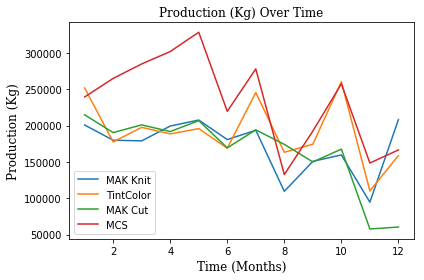

In [55]:
for factory in factory_data: 
    x = factory_data[factory]["month"]
    y = factory_data[factory]["production"]
    plt.plot(x, y)
    plt.legend(("MAK Knit", "TintColor", "MAK Cut", "MCS"))
    plt.xlabel("Time (Months)", **font)
    plt.ylabel("Production (Kg)", **font)
    plt.title("Production (Kg) Over Time", **font)
    plt.tight_layout()
    plt.savefig("images/production_total.png")
plt.show()

# Cotton Creation

In [56]:
total_production = []
for factory in factory_data: 
    total_production.append(factory_data[factory]["production"])

ave_monthly_prod = []
monthly_production = []
for total_data in range(len(total_production[0])): 
    sum_data = 0
    for factory in total_production:
        sum_data += factory[total_data]
    ave_monthly_prod.append(sum_data / 4)

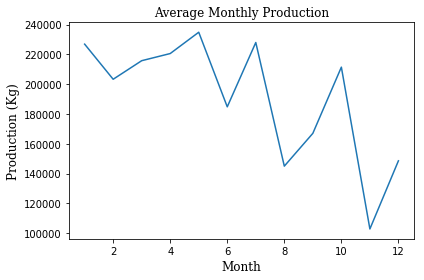

In [57]:
plt.plot(x, ave_monthly_prod)
plt.xlabel("Month", **font)
plt.ylabel("Production (Kg)", **font)
plt.title("Average Monthly Production", **font)
plt.tight_layout()
plt.savefig("images/average_production.png")
plt.show()

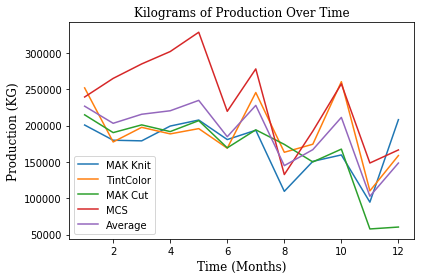

In [58]:
for factory in factory_data: 
    x = factory_data[factory]["month"]
    y = factory_data[factory]["production"]
    plt.plot(x, y)
plt.plot(x, ave_monthly_prod)
plt.legend(("MAK Knit", "TintColor", "MAK Cut", "MCS", "Average"))
plt.xlabel("Time (Months)", **font)
plt.ylabel("Production (KG)", **font)
plt.title("Kilograms of Production Over Time", **font)
plt.tight_layout()
plt.savefig("images/total_production_ave.png")
plt.show()

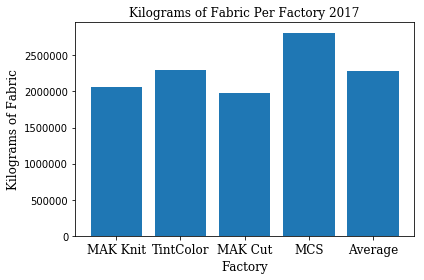

In [59]:
#1234567890123456789012345678901234567890123456789012345678901234567890123456789
y = []
[y.append(sum(factory_data[factory]["production"])) for factory in factory_data]
y.append(sum(ave_monthly_prod))
x = range(len(y))

plt.bar(x, y)
plt.xticks(x, ("MAK Knit", "TintColor", "MAK Cut", "MCS", "Average"), **font)
plt.title("Kilograms of Fabric Per Factory 2017", **font)
plt.xlabel("Factory", **font)
plt.ylabel("Kilograms of Fabric", **font)
plt.tight_layout()
plt.savefig("images/production_bar_ave.png")
plt.show()

In [60]:
data_Cotton = factory_data["TintColor"].copy(deep=True)
data_Cotton["production"] = [1.15 * x for x in ave_monthly_prod]
data_Cotton["factory"] = "Cotton"
data_Cotton["supplier"] = "NA"
data_Cotton["fuel"] = "NA"
data_Cotton["type"] = "NA"
data_Cotton["unit_fuel"] = "NA"
data_Cotton.head()

,Unnamed: 0,month,year,fuel,production,factory,type,supplier,unit_fuel,unit_production,day,date,TintColor_fuel,TintColor_production,emission_factor
0,0,1,2017,NA,260854.241250,Cotton,NA,NA,NA,kilograms,1,2017-01-01,146760,251994,2.88513
1,1,2,2017,NA,233768.564375,Cotton,NA,NA,NA,kilograms,1,2017-02-01,110330,177575,2.88513
2,2,3,2017,NA,248086.093125,Cotton,NA,NA,NA,kilograms,1,2017-03-01,106470,197719,2.88513
3,3,4,2017,NA,253604.425625,Cotton,NA,NA,NA,kilograms,1,2017-04-01,89737,188713,2.88513
4,4,5,2017,NA,270039.874875,Cotton,NA,NA,NA,kilograms,1,2017-05-01,95544,195952,2.88513


In [61]:
data_Cotton = factory_data["TintColor"].copy(deep=True)
data_Cotton["production"] = ave_monthly_prod
data_Cotton["factory"] = "Cotton"
data_Cotton["supplier"] = "NA"
data_Cotton["fuel"] = "NA"
data_Cotton["type"] = "NA"
data_Cotton["unit_fuel"] = "NA"
data_Cotton.head()

,Unnamed: 0,month,year,fuel,production,factory,type,supplier,unit_fuel,unit_production,day,date,TintColor_fuel,TintColor_production,emission_factor
0,0,1,2017,NA,226829.7750,Cotton,NA,NA,NA,kilograms,1,2017-01-01,146760,251994,2.88513
1,1,2,2017,NA,203277.0125,Cotton,NA,NA,NA,kilograms,1,2017-02-01,110330,177575,2.88513
2,2,3,2017,NA,215727.0375,Cotton,NA,NA,NA,kilograms,1,2017-03-01,106470,197719,2.88513
3,3,4,2017,NA,220525.5875,Cotton,NA,NA,NA,kilograms,1,2017-04-01,89737,188713,2.88513
4,4,5,2017,NA,234817.2825,Cotton,NA,NA,NA,kilograms,1,2017-05-01,95544,195952,2.88513


In [62]:
data_Conv_Cotton = data_Cotton.copy(deep=True)
data_Org_Cotton = data_Cotton.copy(deep=True)

# Kilograms to CO2

In [63]:
#1234567890123456789012345678901234567890123456789012345678901234567890123456789

In [64]:
conv_cotton_conversion = 4.5364
org_cotton_conversion = 2.380

In [65]:
emission_factors = pd.read_csv(user + "/data/data_exploration/emission_factors.csv")


In [66]:
data_Conv_Cotton["emission_factor"] = conv_cotton_conversion
data_Org_Cotton["emission_factor"] = org_cotton_conversion

In [67]:
for factory in factory_data: 
    factory_data[factory]["emission_factor"] = (emission_factors.loc[emission_factors['factory'] == 
                                                                     factory, 'emission_factor'].iloc[0])
    path = '/Users/Colette/anaconda_important_code/acapstone'
    factory_data[factory].to_csv(path + "/data/data_exploration/data_" + factory + ".csv", index=False)

data_Conv_Cotton.to_csv(path + "/data/data_final/data_Conv_Cotton.csv", index=False)
data_Org_Cotton.to_csv(path + "/data/data_final/data_Org_Cotton.csv", index=False)